**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - EDA Checkpoint

# Names

- **Group Member 2**
- **Group Member 1**
- Matthew Paoletta
- **Group Member 3**

# Research Question

What factors are the strongest predictors of whether or not a set of music artists would collaborate? Between demographic information (age, gender, race, nationality, etc.) or artistic information (genre, popularity, etc.), which type of factor is more impactful? Are the most informative factors a mixture of these two categories?

## Background and Prior Work



Collaboration between artists is something that has become very popular in recent years. Whether that is composing the music, writing the songs, or artists performing collaboratively we see many instances of this in today’s music industry. Collaboration between artists often opens their music to wider audiences, serving as a way to increase an artist's exposure while also creating new and unique approaches to music. The effects of collaboration are often analyzed, however, here we hope to explore the features that lead to collaboration in the first place. Understanding these features will give us insight into what factors influence collaboration and what is their predictability.

There are many factors that might contribute to the any given collaboration, including artist information and demographical characteristics. These might include artists popularity and genre. For instance we often see frequent collaborations among the same genres, as we see in genres like Hip-Hop, where artist frequently make use of featured collaborations. Furthermore, other potential leading features of collaboration to consider would be demographic information, such as, gender, race, nationality, and age. For example, we can consider how similarities in geogrpahical region might lead for artist collaboration because of accessibility. Analyzing these factors across artistic information and demographics will assist us in identifying reliable predictors of artists collaboration.

Other similar research regarding the correlation between releasing collaborative songs and the artists growth in popularity. Which found there to be a positive effect on an artist's popularity following the release of songs featuring other artists. Furthermore, analysis is done comparing economic and social capitals among other things, concluding that more successful collaborations occur between artists somewhat diverse from one another <a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) Other research perhaps helpful to ours includes Graph Attention Network modeling which is intended to be used to predict potential successful artist collaborations by weighing different features such as genre and artist popularity.<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2) Learning and building on previous research we can analyse demographic and artistic data to identify the predicting factors of musical artists collaborating.


1. <a name="cite_note-1"></a> [^](#cite_ref-1) Abhishek Deshmane and Victor Martinez-de-Albeniz, “Come Together, Right Now: An Empirical Study of Collaborations in the Music Industry,” SSRN Electronic Journal, 2020, https://doi.org/10.2139/ssrn.3743462.
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Jay Yu, “Re-Mix and Match!,” Medium, May 15, 2023, https://medium.com/stanford-cs224w/re-mix-and-match-829b187139b0.


# Hypothesis


We predict that artist genre and artist popularity will be the strongest predictors of whether or not a set of music artists would collaborate. We think that a music artist's genre and popularity together say a lot about the particular audience of that artist, and for the sake of success it's in the artists' best interests to make their collaborative work appealing to each of their fanbases. For example, it's common to see two famous rappers collaborate on a song, but it would be surprising to see a pop star work with an underground indie band.

# Data

# Revised Dataset Overview and Research Approach

This document outlines our datasets, clarifies variable definitions and sources, and details our strategy for identifying artist collaborations—all in service of answering the core research question: 

*What factors are the strongest predictors of whether music artists collaborate? Are artistic features, demographic characteristics, or a combination of both most impactful?*

<br>
---

## 1. Spotify Tracks Dataset

- **Dataset Name:** Spotify Tracks Dataset  
- **Link to the dataset:** [Spotify Tracks Dataset](https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset)  
- **Observations:** 114,000  
- **Variables:** 21

### Variable Definitions and Notes

- **Popularity:**  
  - **Definition:** A score from 0 to 100 reflecting a track’s commercial performance.  
  - **Clarification:** While the dataset provides this popularity metric, it does not detail the underlying methodology (e.g., whether it is based on streaming counts, user engagement, or other factors). Further documentation—potentially from Spotify’s API resources—may be needed to fully understand its derivation.

- **Artists:**  
  - **Definition:** Lists the performer(s) on each track.  
  - **Relevance:** This field is crucial for detecting collaborations. By parsing the string (or list) of artists, we can identify tracks with multiple performers and thereby construct an artist-to-artist collaboration network.

- **Album & Track Names:**  
  - Serve primarily as contextual information for validation and matching across datasets.

- **Audio Features (e.g., danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature):**  
  - **Definition:** Continuous variables capturing various aspects of a track’s musical characteristics.  
  - **Relevance:** When aggregated per artist, these variables form a comprehensive artistic signature, allowing us to assess whether similarities in musical style are linked to collaborative tendencies.

- **Other Variables (e.g., duration_ms, explicit, track_genre):**  
  - Provide additional context—such as track length, content rating, and genre categorization—that can help refine the artist profiles.

---

## 2. Music Artists Popularity (Supplemental Dataset)

- **Dataset Name:** Music Artists Popularity  
- **Link to the dataset:** [Music Artists Popularity](https://www.kaggle.com/datasets/pieca111/music-artists-popularity)  
- **Observations:** 1,466,083  
- **Variables:** 10

### Specific Columns and Relevance

Although the detailed column-by-column documentation for this dataset is less extensive than for the Spotify Tracks dataset, the available information suggests it includes key metrics such as:

- **Artist Identifier/Name:**  
  - Uniquely identifies each artist.
  
- **Popularity Score:**  
  - A measure of the artist’s overall market reach and listenership.
  
- **Additional Market Metrics:**  
  - Likely includes variables such as follower counts, monthly listeners, or other performance indicators.  
  - **Relevance:** These variables serve as a direct measure of an artist’s commercial performance, providing a quantitative baseline to compare with the aggregated artistic attributes from the Spotify Tracks dataset.

For a comprehensive analysis, these columns will be cross-referenced with the artistic features to understand how market performance correlates with creative output and collaboration.

---

## 3. Artist Demographic Dataset

- **Dataset Name:** Artist Demographic  
- **Location:** Located under the data folder (detailed in *mistral.py*)  
- **Source:** Obtained from Mistral AI

### Content and Relevance

- **Information Provided:**  
  - Contains demographic details such as artist age, gender, and potentially nationality or race.
  
- **Role in Analysis:**  
  - These demographic variables are key to addressing the research question by allowing us to compare the influence of demographic versus artistic factors on collaborative behavior.
  - **Clarification:** While the Spotify and popularity datasets focus on artistic and market performance metrics, the demographic dataset fills the gap by providing personal background information that may also predict collaboration trends.

---

## 4. Collaboration Identification and Data Processing

### Identifying Collaborations

- **Methodology:**  
  - **Parsing the 'artists' Column:**  
    - Tracks where the 'artists' field contains multiple names will be flagged as collaborations.
  - **Data Frame Structure:**  
    - A dedicated collaboration data frame will be constructed with the following key components:
      - **Track ID:** Unique identifier from the Spotify Tracks dataset.
      - **Collaborating Artists:** A parsed list or pairwise breakdown of the artists involved.
      - **Aggregated Features:** Derived metrics (e.g., average popularity, mean audio feature scores) for the involved artists.
      
  - **Purpose:**  
    - This structure will serve as the basis for building an artist-to-artist network, facilitating further analyses on how artistic similarity and demographic factors relate to the frequency and nature of collaborations.

---

## 5. Connecting the Data to the Research Question

**Research Question:**  
*What factors are the strongest predictors of whether or not a set of music artists would collaborate? Between demographic information (age, gender, etc.) and artistic information (genre, popularity, etc.), which is more impactful? Or is it a combination of both?*

### Analytical Strategy

1. **Artist-Level Aggregation:**  
   - **From Spotify Tracks:**  
     - Aggregate track-level artistic features and genre information to build detailed artist profiles.
   - **From Music Artists Popularity:**  
     - Incorporate market performance metrics to complement the artistic profiles.
   - **From Artist Demographics:**  
     - Merge demographic data (e.g., age, gender) into the artist profiles to enable a comparative analysis.

2. **Modeling Collaborations:**  
   - **Similarity Metrics:**  
     - Compute similarity scores (e.g., cosine similarity) between artist profiles.
   - **Predictive Modeling:**  
     - Develop models (logistic regression, random forests, etc.) to predict whether a pair of artists will collaborate based on the aggregated features.
   - **Feature Importance:**  
     - Use analyses such as permutation importance or SHAP values to quantify the contribution of artistic versus demographic factors in predicting collaborations.or.

## Spotify Tracks Dataset

In [76]:
## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION
import numpy as np
import pandas as pd

tracks = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")

tracks = tracks[['track_id', 'artists', 'track_name', 'danceability']]

tracks = tracks.dropna()

artists_danceability = tracks

artists_danceability['artists'] = tracks['artists'].str.split(';').explode('artists')

artists_danceability = pd.DataFrame(artists_danceability.groupby('artists')['danceability'].mean())

artists_danceability


,danceability
artists,
"""Little"" Jimmie Dickens",0.8260
"""Puppy Dog Pals"" Cast",0.4930
"""Weird Al"" Yankovic",0.7196
#Kids,0.7240
$pyda,0.6940
...,...
黃德斌,0.9170
黃敏華,0.6700
黄霄雲,0.1570


## Music Artists Popularity

In [53]:
## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION
import kagglehub
from kagglehub import KaggleDatasetAdapter

artists_popularity = kagglehub.dataset_load(KaggleDatasetAdapter.PANDAS, "pieca111/music-artists-popularity", "artists.csv",)

artists_popularity = artists_popularity[['artist_lastfm', 'listeners_lastfm']]

artists_popularity.columns = ['artists', 'listeners']

artists_popularity = artists_popularity.dropna()

artists_popularity

/Users/willlang/Library/Python/3.9/lib/python/site-packages/kagglehub/pandas_datasets.py:91: DtypeWarning: Columns (2,4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  result = read_function(


,artists,listeners
0,Coldplay,5381567.0
1,Radiohead,4732528.0
2,Red Hot Chili Peppers,4620835.0
3,Rihanna,4558193.0
4,Eminem,4517997.0
...,...,...
986755,전- 소영,0.0
986756,정체,0.0
986757,조진원 & 홍종임,0.0
986758,천상지희 다나 & 선데이,0.0


## Final Dataset

In [74]:
artists = pd.merge(artists_danceability, artists_popularity, on='artists')

#artists = artists[artists['listeners'] > 1000]

artists

,artists,danceability,listeners
0,&ME,0.44120,24776.0
1,04 Limited Sazabys,0.82200,4229.0
2,070 Shake,0.52925,36389.0
3,1 Trait Danger,0.66600,394.0
4,10 Years,0.63850,581485.0
...,...,...,...
14647,鮑比達,0.68200,70.0
14648,黃仲崑,0.49900,90.0
14649,黃妃,0.49450,318.0
14650,黃小琥,0.41700,4051.0


# Results

## Exploratory Data Analysis

These are two distributions for the values variables monthly listeners and artists average danceability score. These values were gathered from the files and cleaned so that they can be distributed.

### Section 1: Artist's Average Danceability Score Distribution

We gathered information Spotify Tracks Dataset took all the songs that we have in the dataset for the artist, averaged their danceability scores and then distributed these values.

Matplotlib is building the font cache; this may take a moment.


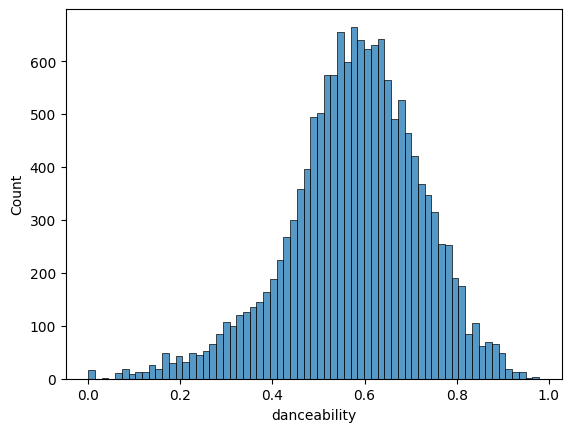

In [57]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(artists, x='danceability')
plt.show()

### Section 2: Popularity Distribution

The distribution of monthly listeners on Last.fm, which we gather from the Music Artist Popularity Dataset. 

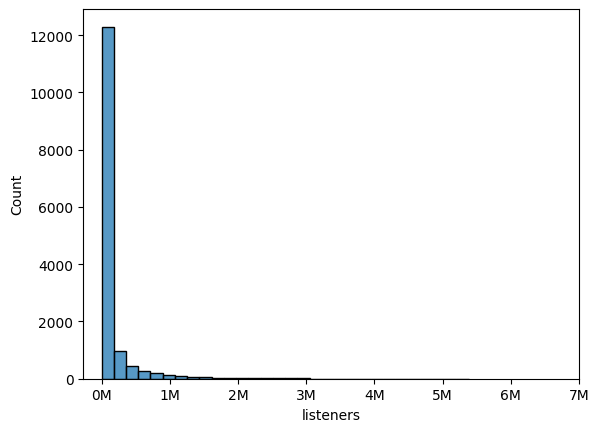

In [79]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION
sns.histplot(artists, x='listeners', bins=30, kde=False);

# Customize the x-axis to show 1 million, 2 million, etc.
plt.xticks(ticks=np.arange(0, 7000001, 1000000), labels=[f'{x//1000000}M' for x in np.arange(0, 7000001, 1000000)]);

# Ethics & Privacy

Although the music artists we will be analyzing are all more or less famous celebrities in the public eye, there are still concerns surrounding data privacy that we must consider for this project. In particular, it is possible that there is publicly available information about an artist which that artist does not want to be available. For this reason, it is important to check whether artists have consented for the data we are using to be released to the public, and if not we should avoid using that data. Fortunately, the artist information we are interested in, both artistic and demographic, originates from whatever information the artsists have released to the public themselves, such as their name, their songs, the language of their music if applicable, and their country of origin if they have specified it.

One potential form of bias in our data sets would be a lack of representation of artists who are up-and-coming or otherwise not as popular as others. Naturally, more popular artists have likely 1) had more time to participate in more collaborations, and 2) have a greater network of connections in the industry which further facilitates collaborations. Perhaps it would be possible to isolate and normalize against artist popularity when drawing conclusions, or else it may be necessary to accept that the conclusions apply more to the most famous artists.

The greatest ethical concern for this project would be the potential reinforcement of harmful cultural stereotypes. Given that part of the research question seeks to understand how social identity factors impact music collaborations, it is possible that the conclusions of the analysis could implicitly outline issues of segregation and/or discrimination in general. It will be important throughout the project to not translate superficial data associations into dangerous cultural attitudes like an "us vs. them" mentality, and whenever these associations appear we should instead seek constructive explanations informed by history and social studies.

# Team Expectations 

**Team Expectation 1: Regular and Responsive Communication**  
We will use Instagram Direct Message for daily communication and Zoom for our weekly meetings, ensuring everyone checks in daily and responds within 24 hours on weekdays. This approach will help us quickly address issues and maintain steady project progress.

**Team Expectation 2: Equitable Task Distribution and Accountability**  
All team members will contribute to every project aspect by leveraging our individual strengths, with tasks assigned and tracked. We will provide progress updates at every meeting to ensure transparency and accountability.

**Team Expectation 3: Respectful and Constructive Collaboration**  
We commit to a “blunt but polite” tone using “I” statements to express opinions and offer constructive feedback. When disagreements arise, we will address them directly and collaboratively seek solutions.

**Team Expectation 4: Flexibility and Timely Problem Resolution**  
If a team member encounters difficulties, they will inform the group immediately so that tasks can be redistributed as needed. We will maintain flexible timelines and schedules, addressing issues early to keep the project on track.

# Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 1/20  |  1 PM | Read & Think about COGS 108 expectations; brainstorm topics/questions  | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research |
| 2/23  |  10 AM |  Find ideal dataset | Final decision about dataset we're using |
| 3/9  | 10 AM  | Complete EDA Analysis  | Final check up on the work done so far, submit it Canvas   |
| 3/15  | 10 AM  | Finalize Analysis; create a recommender model | Review/Edit the analysis and the recommender model |
| 3/17  | 10 AM  | Write scripts for the final video | Film final video |
| 3/18  | 10 AM  | Complete analysis; Draft results/conclusion/discussion (Wasp)| Discuss/edit full project |
| 3/19  | Before 11:59 PM  | NA | Turn in Final Project & Group Project Surveys |